# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Loading the dataset

In [ ]:
data = pd.read_excel('/content/events.xls', header=1)
# Rename columns using the values from the original first row (index 0)
original_header = pd.read_excel('/content/events.xls', nrows=1).iloc[0].tolist()
data.columns = original_header
display(data.head())

,Event,Program stage,Event date,Geometry,Longitude,Latitude,Organisation unit name,Organisation unit code,Organisation unit,M&MCCoD Reporting Mode,...,M&MCCoD Report chain of events 'due to' (b) in order (Cause of death (free text)),M&MCCoD Report chain of events 'due to' (b) in order (Time interval from onset to death),M&MCCoD Report chain of events 'due to' (c) in order (if applicable) (Cause of death),M&MCCoD Report chain of events 'due to' (c) in order (if applicable) (Time interval from onset to death),M&MCCoD Report chain of events 'due to' (c) in order (if applicable) (Time interval type from onset to death),M&MCCoD Report chain of events 'due to' (d) in order (if applicable) (Cause of death (free text)),M&MCCoD Report chain of events 'due to' (d) in order (if applicable) (Time interval from onset to death),M&MCCoD Report disease or condition directly leading to death on line a (Cause of death (free text)),M&MCCoD Report disease or condition directly leading to death on line a (Cause of death),M&MCCoD Report disease or condition directly leading to death on line a (Time interval type from onset to death)
0,hJ3vOJ2whMQ,fvF9K36GKeP,2025-04-23 09:42:36.162,NaN,0.0,0.0,Kisumu County Hospital,13704,uBfCuhllvg3,Morbidity,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,aTILeIoy6cZ,fvF9K36GKeP,2025-04-23 10:22:13.066,NaN,0.0,0.0,Kisumu County Hospital,13704,uBfCuhllvg3,Morbidity,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,klhfvfxm8GY,fvF9K36GKeP,2025-04-25 14:14:59.603,NaN,0.0,0.0,Kisumu County Hospital,13704,uBfCuhllvg3,Mortality,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dehydration,NaN
3,m0Rd60jVUtY,4,2025-04-17 15:52:29.242,NaN,0.0,0.0,Kisumu County Hospital,13704,uBfCuhllvg3,Morbidity,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,JFPVHyGpO1x,fvF9K36GKeP,2025-04-24 08:58:29.065,NaN,0.0,0.0,Kisumu County Hospital,13704,uBfCuhllvg3,Morbidity,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Exploration

In [ ]:
display(data.columns)

Index(['Event', 'Program stage', 'Event date', 'Geometry', 'Longitude',
       'Latitude', 'Organisation unit name', 'Organisation unit code',
       'Organisation unit', 'M&MCCoD  Reporting Mode', 'M&MCCoD Sex',
       'M&MCCoD Age', 'M&MCCoD_Alive_Age Unit',
       'M&MCCoD Report disease or condition directly leading to death on line a (Code)',
       'M&MCCoD Report chain of events 'due to' (b) in order (Code)',
       'M&MCCoD Report chain of events 'due to' (c) in order (if applicable) (Code)',
       'M&MCCoD Report chain of events 'due to' (d) in order (if applicable) (Code)',
       'M&MCCoD State the underlying causes Cause of death (ICD-11 Code)',
       'M&MCCoD Other significant conditions contributing to death (Diagnosis C_code) ',
       'M&MCCoD Other significant conditions contributing to death (Diagnosis B_code) ',
       'M&MCCoD  Year of Occurrence', 'M&MCCoD_Alive_Date of Discharge',
       'M&MCCoD_Alive_Primary diagnosis',
       'M&MCCoD State the underlying cau

In [ ]:
columns_to_keep = [
    'Event date',
    'Organisation unit name',
    'M&MCCoD Sex',
    'M&MCCoD Age',
    'M&MCCoD  Year of Occurrence', # Corrected column name
    'M&MCCoD_Alive_Date of Discharge',
    'M&MCCoD Month of Occurrence',
    'M&MCCoD_Alive_Primary diagnosis'
]

data = data[columns_to_keep]
display(data.head())

,Event date,Organisation unit name,M&MCCoD Sex,M&MCCoD Age,M&MCCoD Year of Occurrence,M&MCCoD_Alive_Date of Discharge,M&MCCoD Month of Occurrence,M&MCCoD_Alive_Primary diagnosis
0,2025-04-23 09:42:36.162,Kisumu County Hospital,Female,60.0,2025.0,2025-04-10T21:00:00.000Z,April,Postmenopausal uterine bleeding
1,2025-04-23 10:22:13.066,Kisumu County Hospital,Female,64.0,2025.0,2025-04-17T21:00:00.000Z,April,Lymphomatoid granulomatosis
2,2025-04-25 14:14:59.603,Kisumu County Hospital,Female,26.0,NaN,NaN,NaN,NaN
3,2025-04-17 15:52:29.242,Kisumu County Hospital,Female,54.0,2025.0,2025-04-03T21:00:00.000Z,April,Nontoxic multinodular goitre
4,2025-04-24 08:58:29.065,Kisumu County Hospital,Female,37.0,2025.0,2025-04-01T21:00:00.000Z,April,Anal fistula


In [ ]:
#loading and saving the new data
data.to_excel('Eventsnew_data.xlsx', index=False)

In [ ]:
data.shape

(4174, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4174 entries, 0 to 4173
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Event date                       4174 non-null   object 
 1   Organisation unit name           4174 non-null   object 
 2   M&MCCoD Sex                      4174 non-null   object 
 3   M&MCCoD Age                      4174 non-null   float64
 4   M&MCCoD  Year of Occurrence      3919 non-null   float64
 5   M&MCCoD_Alive_Date of Discharge  3919 non-null   object 
 6   M&MCCoD Month of Occurrence      3919 non-null   object 
 7   M&MCCoD_Alive_Primary diagnosis  3919 non-null   object 
dtypes: float64(2), object(6)
memory usage: 261.0+ KB


In [ ]:
data.describe()

,M&MCCoD Age,M&MCCoD Year of Occurrence
count,4174.000000,3919.000000
mean,33.425252,2024.861955
std,34.592767,0.386843
min,-19.000000,2021.000000
25%,20.000000,2025.000000
50%,26.000000,2025.000000
75%,37.000000,2025.000000
max,353.000000,2025.000000


# Data Preprocessing

## Handling Missing Values

In [ ]:
#checking for missing values
data.isnull().sum()

,0
Event date,0
Organisation unit name,0
M&MCCoD Sex,0
M&MCCoD Age,0
M&MCCoD Year of Occurrence,255
M&MCCoD_Alive_Date of Discharge,255
M&MCCoD Month of Occurrence,255
M&MCCoD_Alive_Primary diagnosis,255


In [ ]:
#dropping the missing values
data.dropna(inplace=True)

/tmp/ipython-input-2860470877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [ ]:
data.shape

(3919, 8)

## Handling Duplicate Values

In [ ]:
#checkinh for duplicate values
data.duplicated().sum()

np.int64(0)

# Analysis

## Length of Stay

In [ ]:
# Calculating The Length of Stay (LOS);This is the difference between the discharge and event dates.
data['LOS'] = pd.to_datetime(data['M&MCCoD_Alive_Date of Discharge'], utc=True) - pd.to_datetime(data['Event date'], utc=True)
display(data['LOS'])

/tmp/ipython-input-2574531115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LOS'] = pd.to_datetime(data['M&MCCoD_Alive_Date of Discharge'], utc=True) - pd.to_datetime(data['Event date'], utc=True)


,LOS
0,-13 days +11:17:23.838000
1,-6 days +10:37:46.934000
3,-14 days +05:07:30.758000
4,-23 days +12:01:30.935000
5,-19 days +10:31:09.992000
...,...
4169,-8 days +07:48:21.407000
4170,-7 days +07:21:35.972000
4171,-39 days +06:21:53.764000
4172,-15 days +04:53:52.131000


In [ ]:
data.columns

Index(['Event date', 'Organisation unit name', 'M&MCCoD Sex', 'M&MCCoD Age',
       'M&MCCoD  Year of Occurrence', 'M&MCCoD_Alive_Date of Discharge',
       'M&MCCoD Month of Occurrence', 'M&MCCoD_Alive_Primary diagnosis', 'LOS',
       'Month'],
      dtype='object')

In [ ]:
data.head()

,Event date,Organisation unit name,M&MCCoD Sex,M&MCCoD Age,M&MCCoD Year of Occurrence,M&MCCoD_Alive_Date of Discharge,M&MCCoD Month of Occurrence,M&MCCoD_Alive_Primary diagnosis,LOS,Month
0,2025-04-23 09:42:36.162,Kisumu County Hospital,Female,60.0,2025.0,2025-04-10T21:00:00.000Z,4,Postmenopausal uterine bleeding,-13 days +11:17:23.838000,2025-04
1,2025-04-23 10:22:13.066,Kisumu County Hospital,Female,64.0,2025.0,2025-04-17T21:00:00.000Z,4,Lymphomatoid granulomatosis,-6 days +10:37:46.934000,2025-04
3,2025-04-17 15:52:29.242,Kisumu County Hospital,Female,54.0,2025.0,2025-04-03T21:00:00.000Z,4,Nontoxic multinodular goitre,-14 days +05:07:30.758000,2025-04
4,2025-04-24 08:58:29.065,Kisumu County Hospital,Female,37.0,2025.0,2025-04-01T21:00:00.000Z,4,Anal fistula,-23 days +12:01:30.935000,2025-04
5,2025-04-28 10:28:50.008,Kisumu County Hospital,Female,36.0,2025.0,2025-04-09T21:00:00.000Z,4,Blighted ovum or nonhydatidiform mole,-19 days +10:31:09.992000,2025-04


## Patient Volume by Month

In [ ]:
# Patient Volume Analysis by Month  Group the data by month to see how many cases occurred each month.
data['Month'] = pd.to_datetime(data['Event date']).dt.to_period('M')
patient_volume_by_month = data.groupby('Month').size().reset_index(name='cases')
patient_volume_by_month['Month'] = patient_volume_by_month['Month'].astype(str)
display(patient_volume_by_month)

/tmp/ipython-input-23581329.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = pd.to_datetime(data['Event date']).dt.to_period('M')


,Month,cases
0,2025-01,792
1,2025-02,736
2,2025-04,242
3,2025-05,688
4,2025-06,172
5,2025-07,409
6,2025-08,756
7,2025-09,124


In [ ]:
# Convert 'Event date' to datetime objects to determine the full date range
data['Event date'] = pd.to_datetime(data['Event date'])

# Determine the full range of months from the data
min_month = data['Event date'].min().to_period('M')
max_month = data['Event date'].max().to_period('M')
all_months = pd.period_range(start=min_month, end=max_month, freq='M')

# Create a DataFrame with all months
all_months_df = pd.DataFrame({'Month': all_months})
all_months_df['Month'] = all_months_df['Month'].astype(str)

# Merge the complete months DataFrame with the patient volume by month DataFrame
patient_volume_by_month_complete = all_months_df.merge(patient_volume_by_month, on='Month', how='left').fillna(0)

# Convert the 'Month' column to datetime and then format to get the month name
patient_volume_by_month_complete['Month'] = pd.to_datetime(patient_volume_by_month_complete['Month']).dt.strftime('%B')

# Display the complete monthly patient volume with month names
display(patient_volume_by_month_complete)

/tmp/ipython-input-175146845.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Event date'] = pd.to_datetime(data['Event date'])


,Month,cases
0,January,792.0
1,February,736.0
2,March,0.0
3,April,242.0
4,May,688.0
5,June,172.0
6,July,409.0
7,August,756.0
8,September,124.0


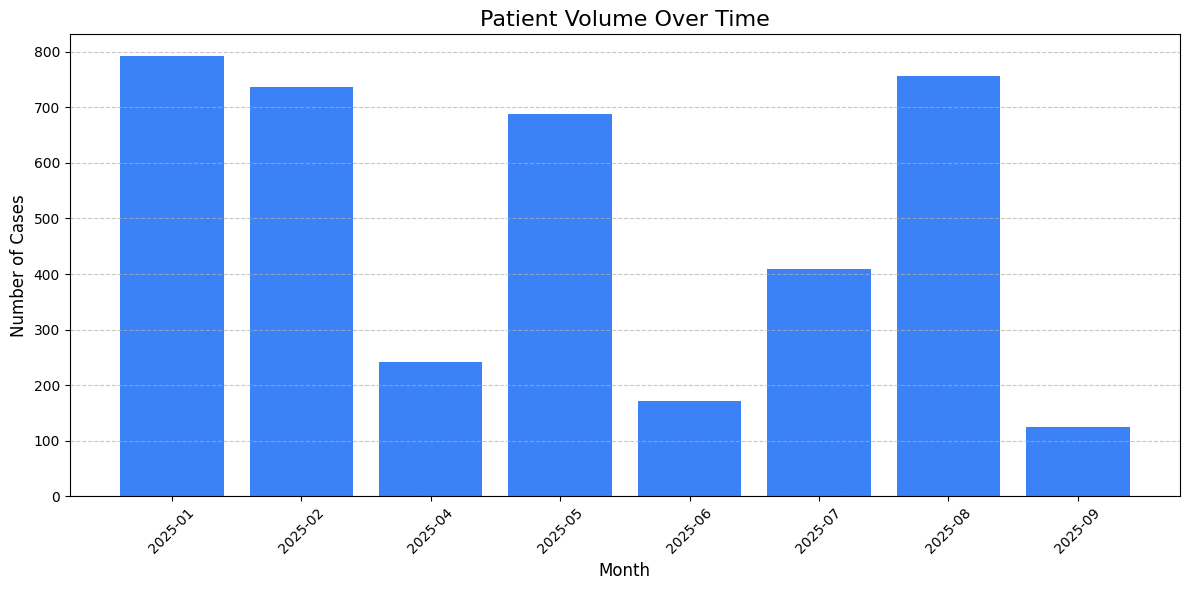

In [39]:
# Patient Volume Over Time ---
plt.figure(figsize=(12, 6))
plt.bar(patient_volume_by_month['Month'], patient_volume_by_month['cases'], color='#3B82F6')
plt.title('Patient Volume Over Time', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Average Length of Stay by Diagnosis

In [38]:
# Average Length of Stay by Diagnosis;This calculates the average length of stay for each medical condition.
avg_los_by_diagnosis = data.groupby('M&MCCoD_Alive_Primary diagnosis')['LOS'].mean().sort_values(ascending=False)
avg_los_by_diagnosis

,LOS
M&MCCoD_Alive_Primary diagnosis,
"Hydrocele or spermatocele, unspecified",-2 days +11:20:39.623000
"Acute upper respiratory infection, site unspecified",-2 days +09:10:46.892000
Other specified epilepsy or seizures,-3 days +11:58:07.845000
Wernicke encephalopathy,-3 days +10:52:15.913000
"Anaemia in chronic kidney disease [Chronic kidney disease, stage 4]",-3 days +09:39:35.370000
...,...
Other specified structural developmental anomalies of liver,-398 days +12:26:16.858000
Cannabis-induced psychotic disorder,-449 days +11:31:45.789500
Cryopyrin-associated periodic syndromes,-592 days +10:59:52.655000


In [41]:
#most common diagnosis
most_common_diagnosis = data['M&MCCoD_Alive_Primary diagnosis'].value_counts().idxmax()
most_common_diagnosis

'Spontaneous vertex delivery'

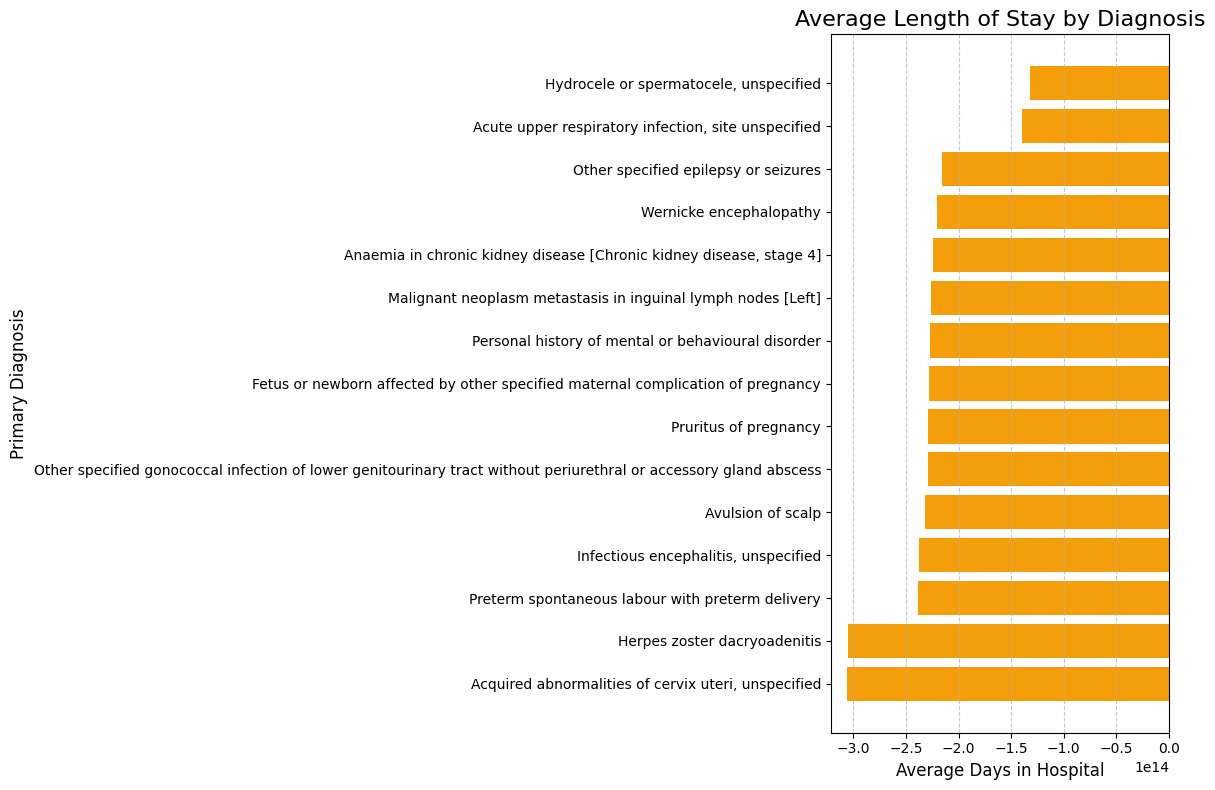

In [40]:
 #Average Length of Stay by Diagnosis ---
plt.figure(figsize=(12, 8))
# Select the top 15 diagnoses for a clear chart
top_15_diagnoses = avg_los_by_diagnosis.head(15)
plt.barh(top_15_diagnoses.index, top_15_diagnoses.values, color='#F59E0B')
plt.title('Average Length of Stay by Diagnosis', fontsize=16)
plt.xlabel('Average Days in Hospital', fontsize=12)
plt.ylabel('Primary Diagnosis', fontsize=12)
plt.gca().invert_yaxis() # Invert y-axis to show the longest stays at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# App.py

In [3]:
import pandas as pd
import numpy as np
try:
    df = pd.read_excel('/content/Eventsnew_data.xlsx')
    print("Data loaded successfully.")
except FileNotFoundError:
    print("Error: The file 'Eventsnew_data.xlsx' was not found.")
    print("Please upload the file to your Colab environment and try again.")
    exit()

# Function to categorize age into groups
def get_age_group(age):
    if 0 <= age <= 14:
        return '0-14 Years'
    elif 15 <= age <= 49:
        return '15-49 Years'
    elif 50 <= age <= 64:
        return '50-64 Years'
    elif age >= 65:
        return '65+ Years'
    else:
        return 'Unknown'

# Apply the age grouping function to create a new column
df['Age Group'] = df['M&MCCoD Age'].apply(get_age_group)

# Recreate the 'Month' column and calculate 'length_of_stay_days'
df['Month'] = pd.to_datetime(df['Event date']).dt.to_period('M').astype(str)
df['length_of_stay_days'] = (pd.to_datetime(df['M&MCCoD_Alive_Date of Discharge'], utc=True) - pd.to_datetime(df['Event date'], utc=True)).dt.days


# Selectors:
# You can change these variables to filter the data.
selected_month = '2025-09'
selected_diagnosis = 'Malaria due to Plasmodium falciparum, unspecified'
selected_age_group = '15-49 Years'
selected_organisation_unit = 'Kisumu County Hospital'
# Filter the DataFrame based on all selected criteria
filtered_patients = df.copy()
if selected_month:
    filtered_patients = filtered_patients[filtered_patients['Month'] == selected_month]

if selected_diagnosis:
    filtered_patients = filtered_patients[filtered_patients['M&MCCoD_Alive_Primary diagnosis'] == selected_diagnosis]

if selected_age_group:
    filtered_patients = filtered_patients[filtered_patients['Age Group'] == selected_age_group]

if selected_organisation_unit:
    filtered_patients = filtered_patients[filtered_patients['Organisation unit name'] == selected_organisation_unit]
# Select and display relevant columns for the filtered patients
patient_details = filtered_patients[['M&MCCoD Sex', 'M&MCCoD Age', 'Age Group', 'M&MCCoD_Alive_Primary diagnosis', 'Organisation unit name', 'length_of_stay_days']]
patient_details.index = np.arange(1, len(patient_details) + 1)
print("\n--- Filtered Patient Details ---")
print(f"Filters applied: Month='{selected_month}', Diagnosis='{selected_diagnosis}', Age Group='{selected_age_group}', Organisation Unit='{selected_organisation_unit}'")
if not patient_details.empty:
    print(patient_details)
else:
    print("No patients found for the selected criteria.")

Data loaded successfully.

--- Filtered Patient Details ---
Filters applied: Month='2025-09', Diagnosis='Malaria due to Plasmodium falciparum, unspecified', Age Group='15-49 Years', Organisation Unit='Kisumu County Hospital'
  M&MCCoD Sex  M&MCCoD Age    Age Group  \
1        Male           37  15-49 Years   

                     M&MCCoD_Alive_Primary diagnosis  Organisation unit name  \
1  Malaria due to Plasmodium falciparum, unspecified  Kisumu County Hospital   

   length_of_stay_days  
1                -10.0  
